In [208]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [20]:
pd_city = pd.read_csv("./city_data.csv")
pd_city.head(5)


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [21]:
pd_city.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [22]:
pd_ride = pd.read_csv("./ride_data.csv")
pd_ride.head(5)


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [23]:
pd_ride.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [119]:
pd_join = pd_city.join(pd_ride.set_index("city"),on="city")
pd_join['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [37]:
pd_join[pd_join['city']=='Amandaburgh']

,city,driver_count,type,date,fare,ride_id
61,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
61,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
61,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
61,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
61,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
61,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421
61,Amandaburgh,12,Urban,2018-03-20 07:40:33,27.45,3701008274871
61,Amandaburgh,12,Urban,2018-04-01 09:24:21,24.29,1995462170530
61,Amandaburgh,12,Urban,2018-04-20 02:16:07,16.27,3513123734716
61,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674


In [111]:
pd_group = pd.DataFrame(data=list(pd_join.groupby(by='city').mean()['fare']),columns=['Average Fare'])

type(pd_join.groupby(by='city').mean()['fare'])
pd_group['city'] = pd_join.groupby(by='city').indices
a = pd_join.groupby(by='city').count()['driver_count']
pd_group['Number of Drivers'] = list(pd_join.groupby(by='city').count()['driver_count'])
pd_group['Number of Rides'] =pd_group['Number of Drivers']
pd_group.set_index('city')
#pd_group.set_index('city')
#pd_group() why re set_index in other cell 

,Average Fare,Number of Drivers,Number of Rides
city,,,
Amandaburgh,24.641667,18,18
Barajasview,25.332273,22,22
Barronchester,36.422500,16,16
Bethanyland,32.956111,18,18
Bradshawfurt,40.064000,10,10
Brandonfort,35.437368,19,19
Carriemouth,28.314444,27,27
Christopherfurt,24.501852,27,27
Colemanland,30.894545,22,22


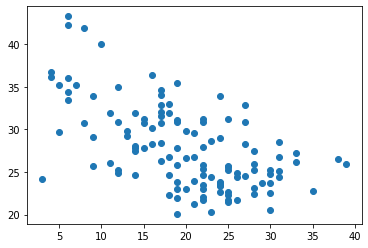

In [126]:
plt.scatter(list(pd_group['Number of Drivers']),list(pd_group['Average Fare']))

In [127]:
pd_join.groupby(by='type').sum()

,driver_count,fare,ride_id
type,,,
Rural,537,4327.93,580968240341287
Suburban,8570,19356.33,3106884522576766
Urban,59602,39854.38,7919412664056093


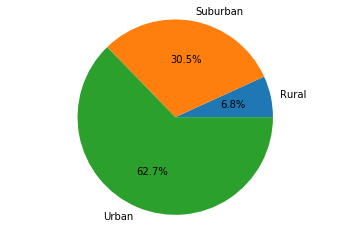

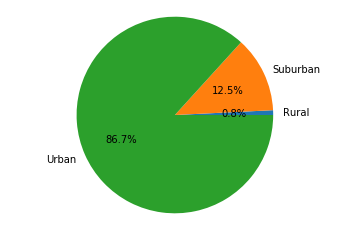

In [132]:
fig,axe1 = plt.subplots()
total_fare_index = pd_join.groupby(by='type').sum()['fare'].index
total_fare_value = list(pd_join.groupby(by='type').sum()['fare'])
axe1.pie(total_fare_value,labels=total_fare_index,autopct='%1.1f%%')
axe1.axis('equal')
total_ride_index = pd_join.groupby(by='type').sum()['driver_count'].index
total_ride_value = list(pd_join.groupby(by='type').sum()['driver_count'])
fig,axe2 = plt.subplots()
axe2.pie(total_ride_value,labels=total_ride_index,autopct='%1.1f%%')
axe2.axis('equal')
plt.show()

In [170]:
wine_pd = pd.read_csv("./wine_data.csv")
#wine_pd.head()
wine_pd['Label'].unique()
labels = wine_pd['Label']
labels
wine_pd = wine_pd.drop(axis=1,columns='Label')
wine_pd.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


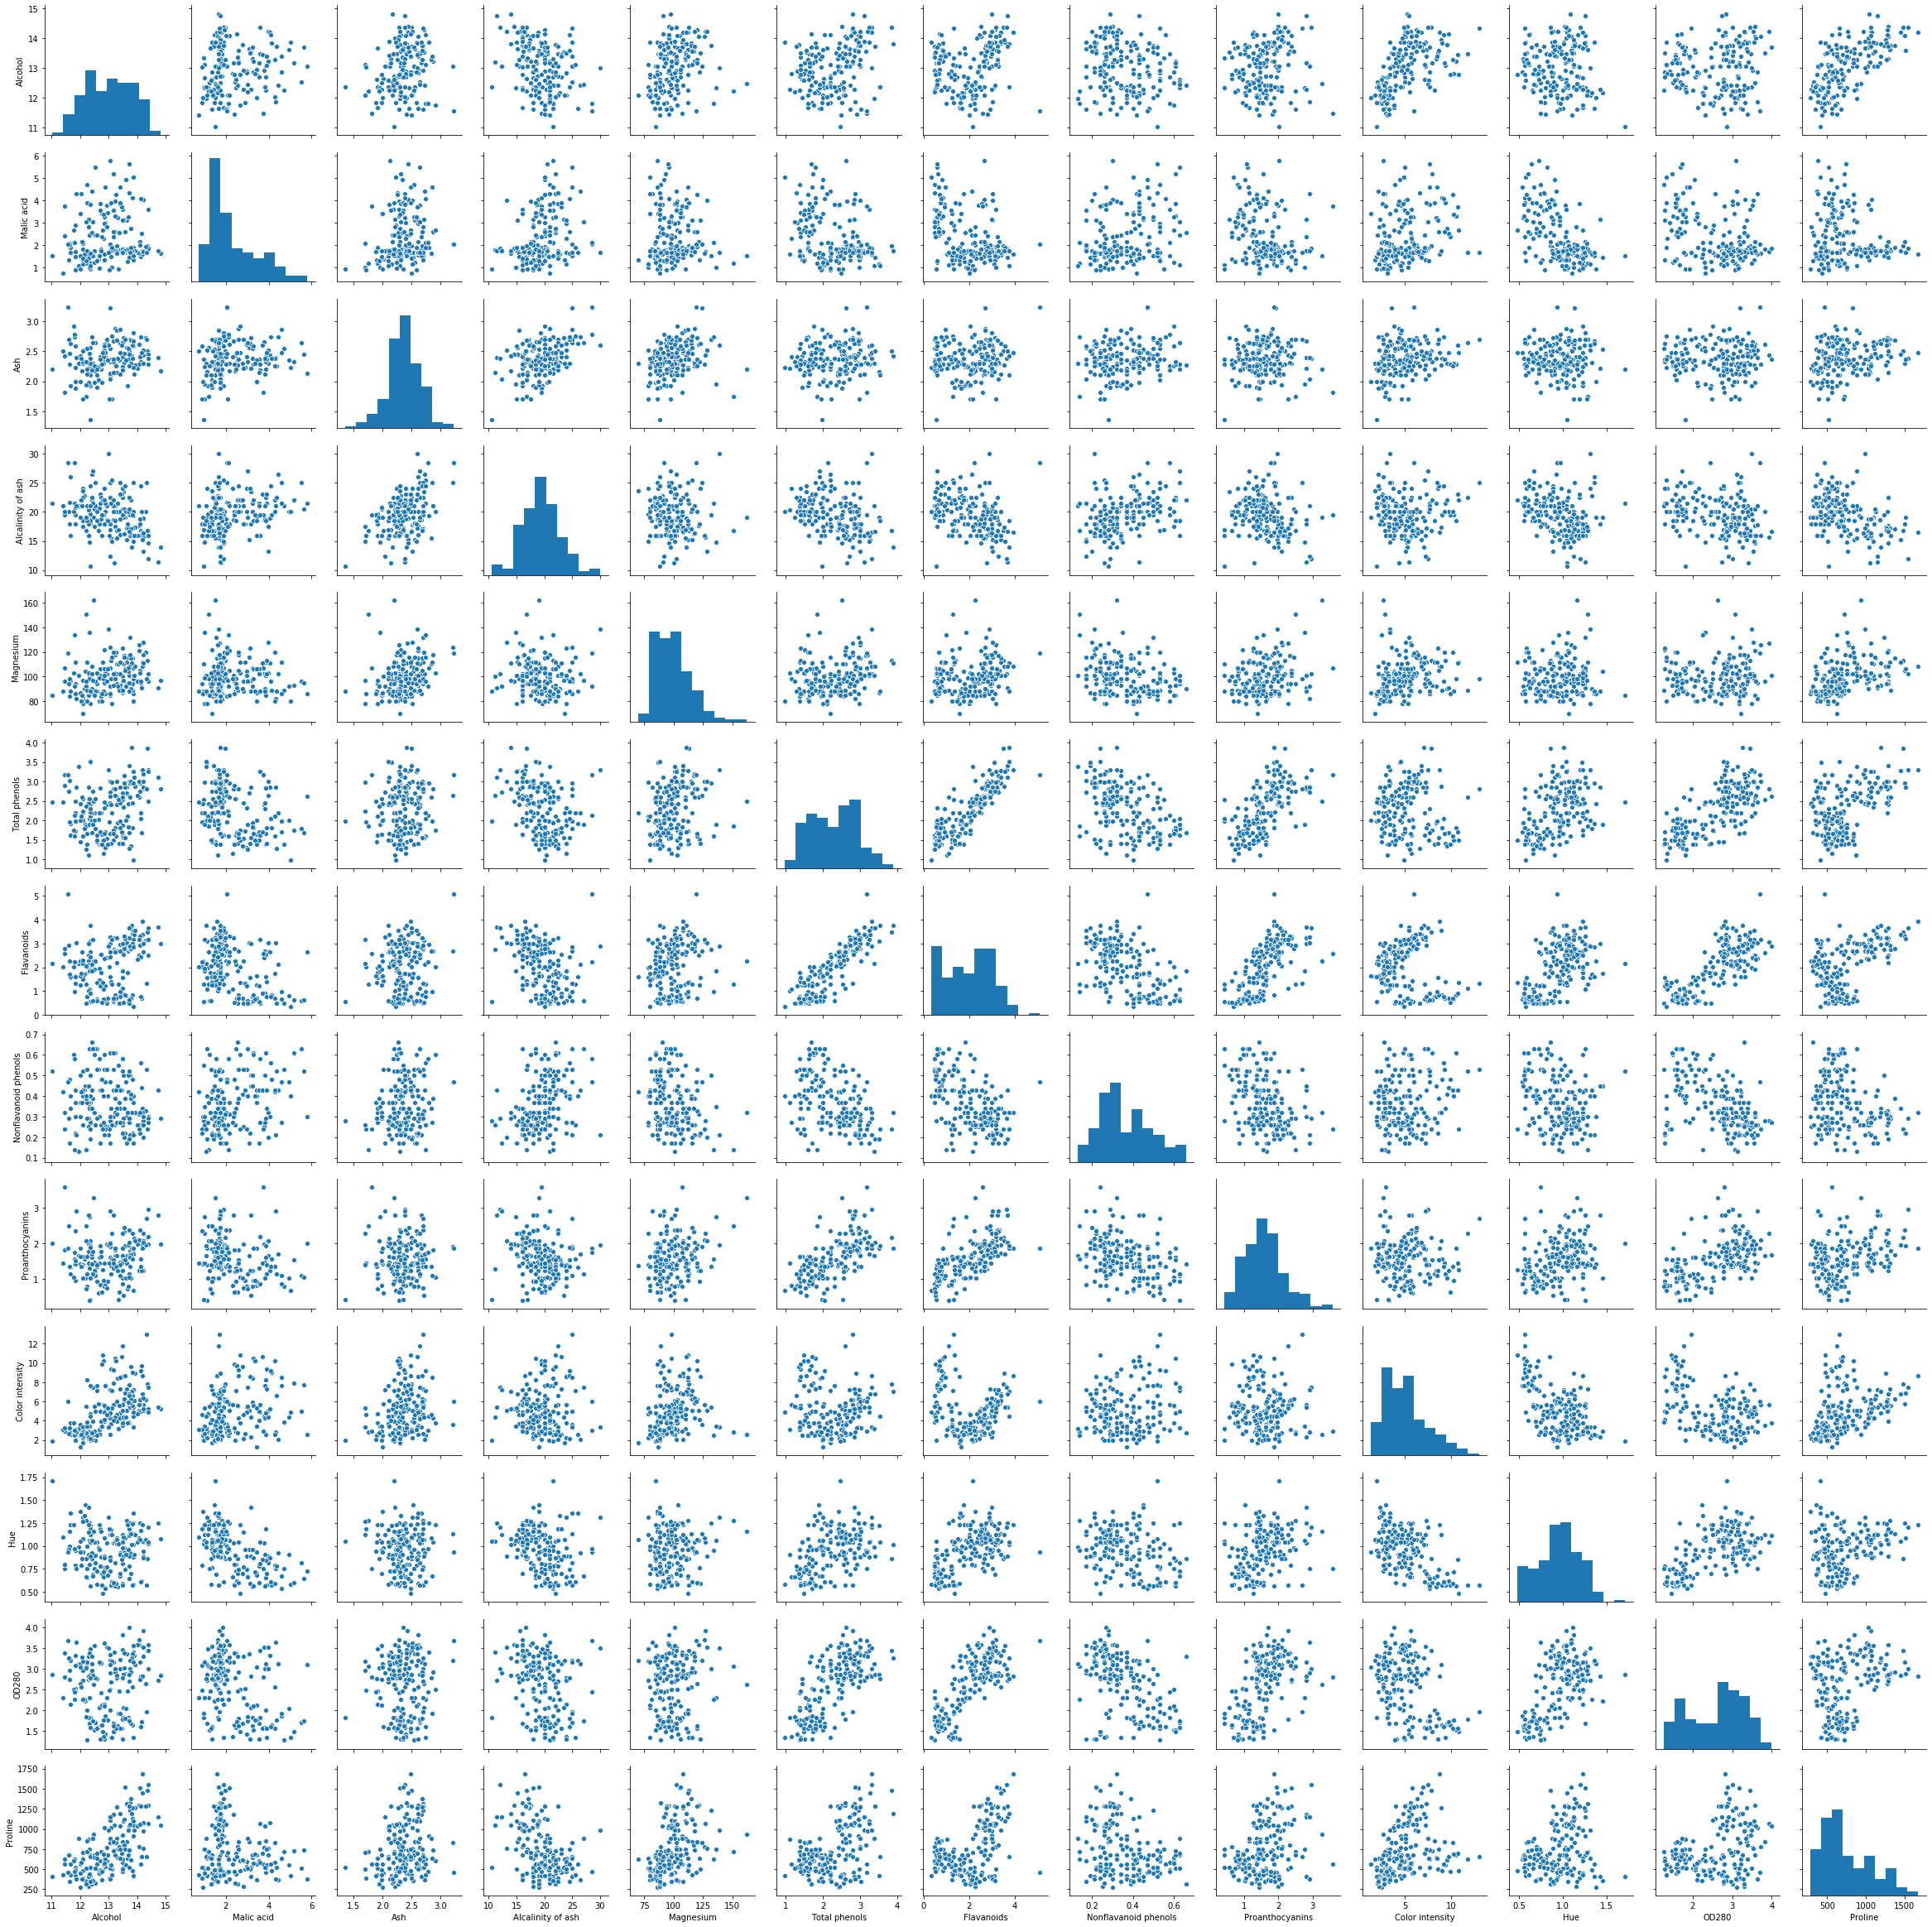

In [224]:
sns_plot = sns.pairplot(wine_pd,diag_kind="hist")

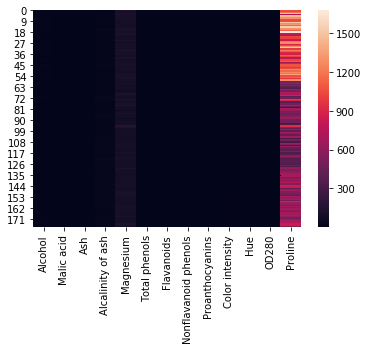

In [220]:
#plt.subplots(figsize=(100,100))
sns.heatmap(wine_pd)


In [195]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [227]:
standardScaler = preprocessing.StandardScaler()
standardScaler.fit(wine_pd)
X_scaled_array = standardScaler.transform(wine_pd)
X_scaled_array
#normalizedData = pd.DataFrame(X_scaled_array, columns = wine_pd.columns)
#normalizedData.head(5)
#len(normalizedData.index)

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [203]:
kMeansClustering = KMeans(n_clusters = 3)
res = kMeansClustering.fit_predict(normalizedData)
res

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [206]:
normalizedData['cluster'] = res
normalizedData.head(3)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline,cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,2


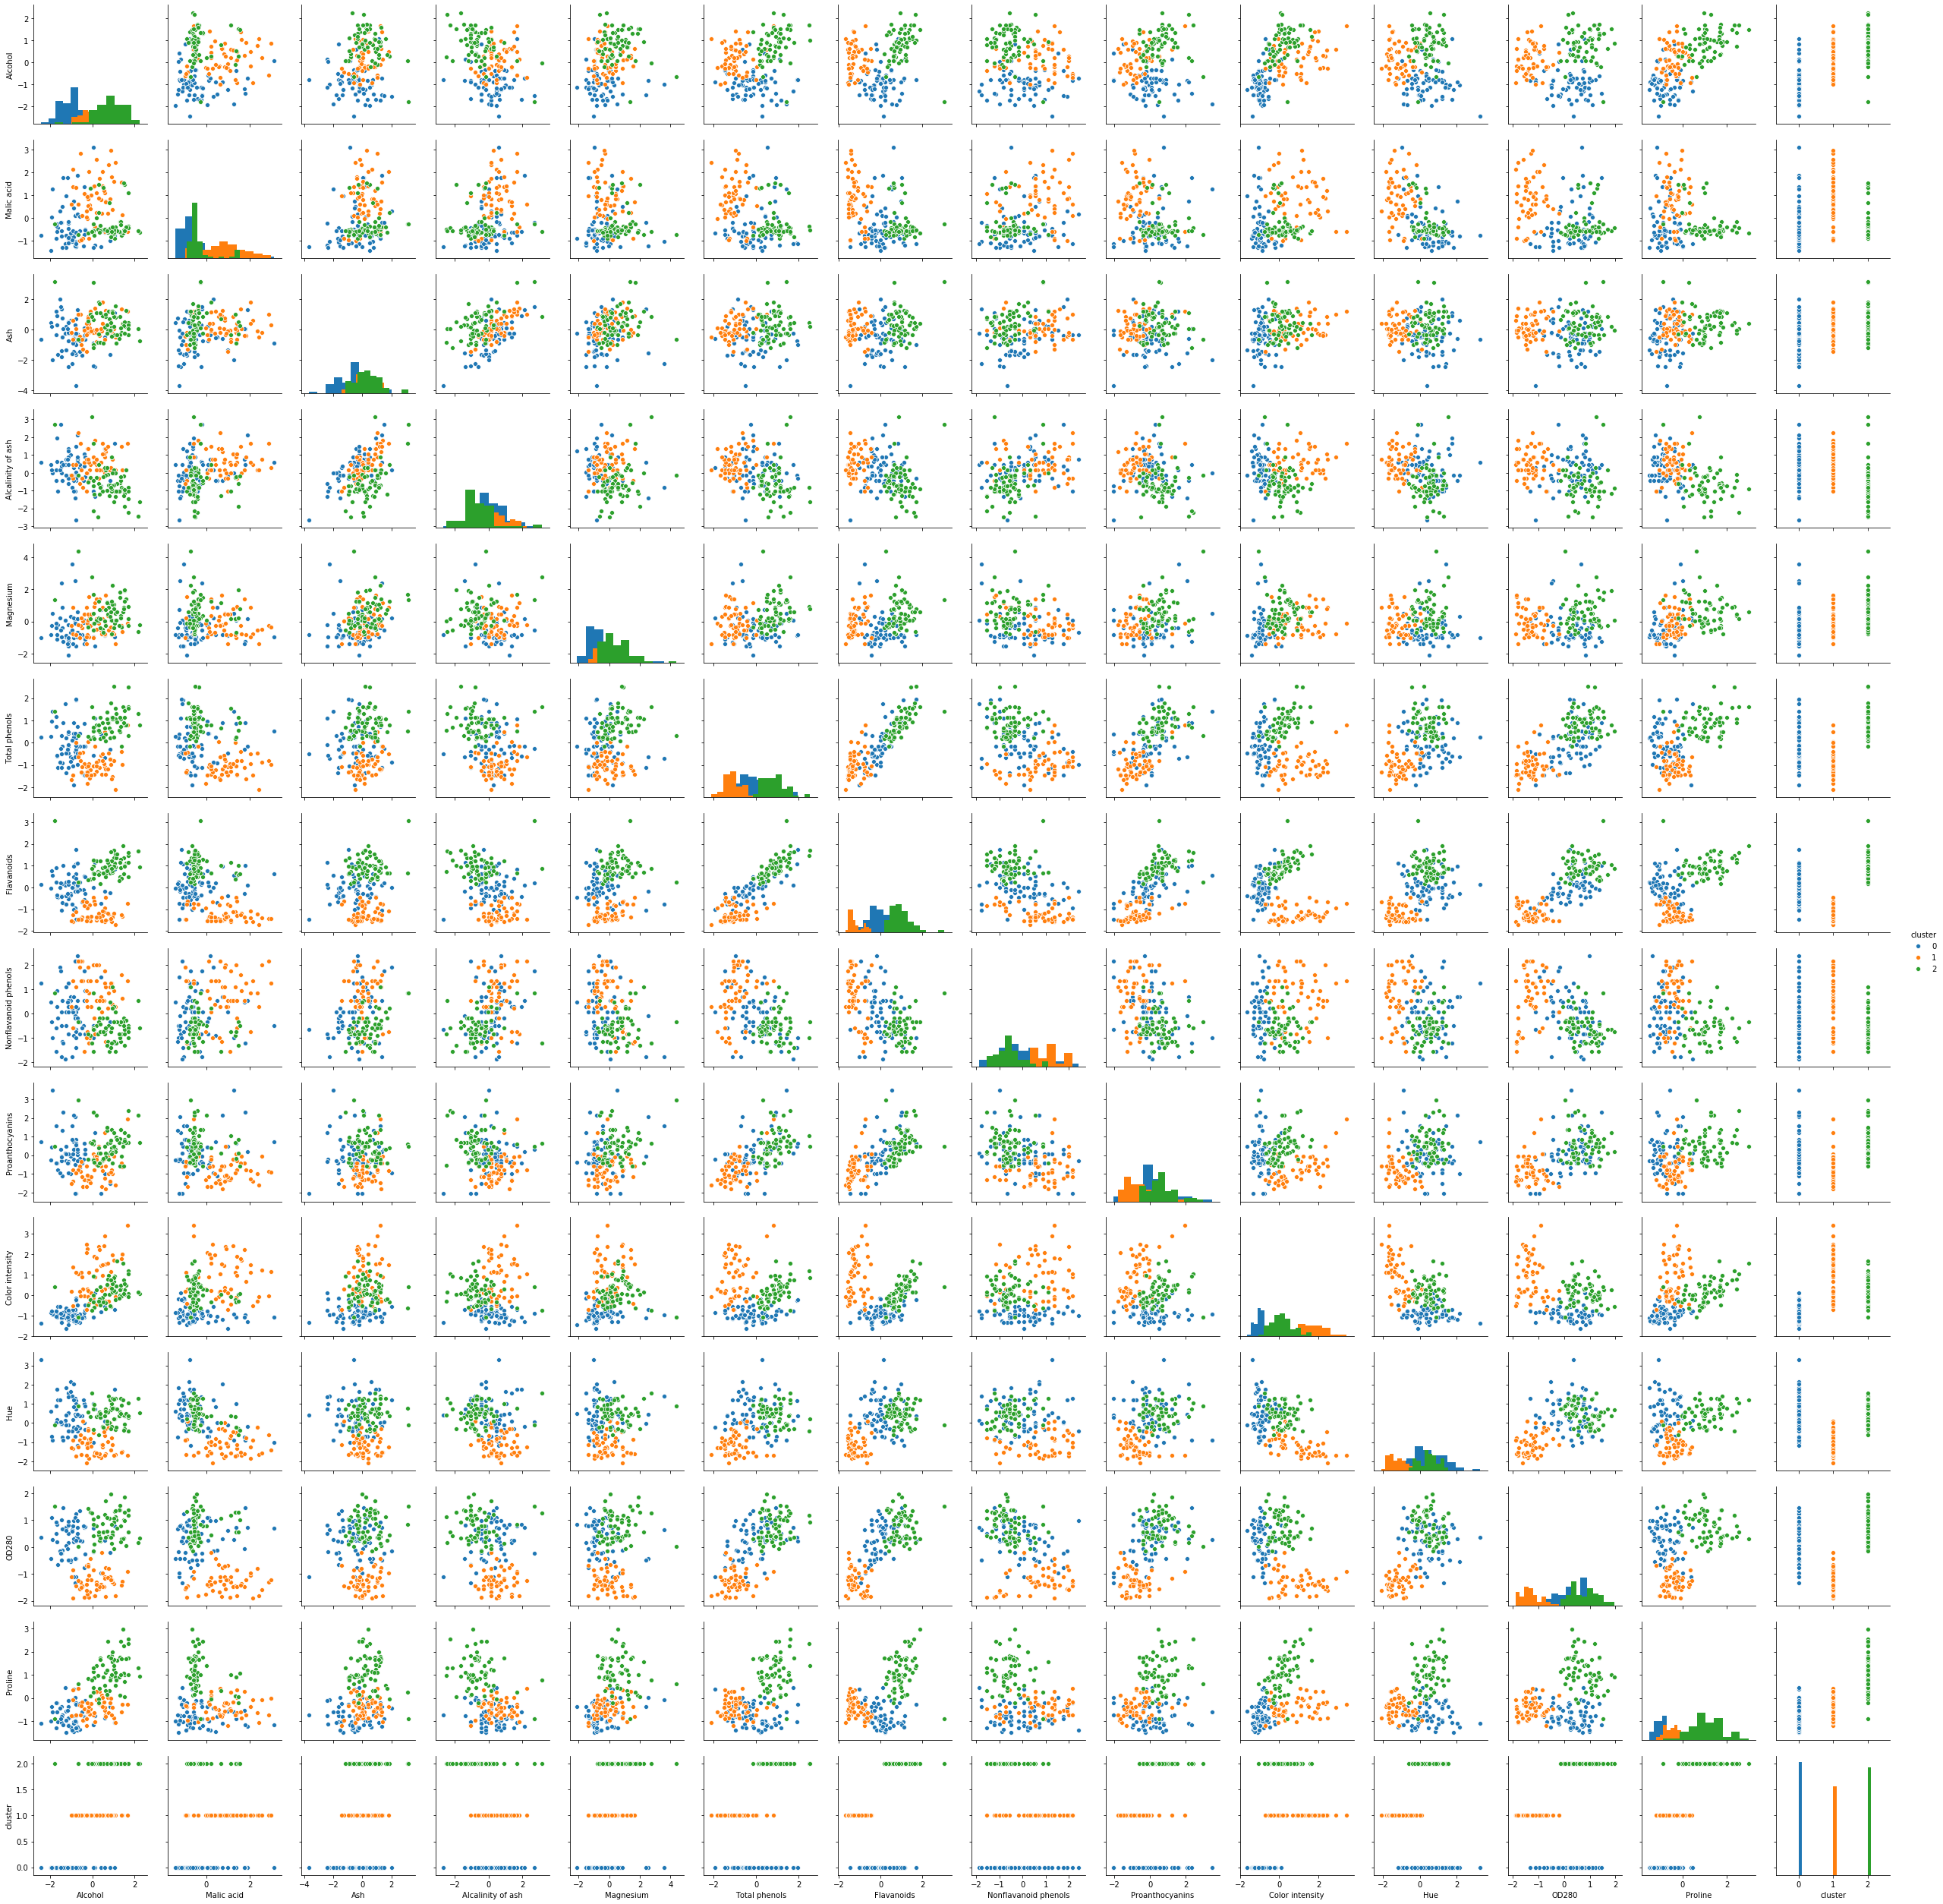

In [209]:
sns_plot = sns.pairplot(normalizedData, hue = "cluster",diag_kind="hist")